In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random, math

In [2]:
class Tour():
    def __init__(self, travel = None):
        self.travel = travel
        self.distance = 1000
        self.fitness = 1.0/self.distance
        
    def evaluate(self,data):
        self.distance = self.sum_distance(data)
        self.fitness = 1.0/self.distance
    
    def sum_distance(self, data):
        sd = 0
        for i in range(len(self.travel)):
            sd = sd + self.dist(data[self.travel[i-1]], data[self.travel[i]])
        return sd
    
    def dist(self, a ,b):
        return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)


In [8]:
class GA_Tsp():
    def __init__(self, filename = 'tsp.txt', num_of_tour = 10):
        self.Tourset = []
        self.data = np.loadtxt(filename)
        self.data_size = len(self.data)
        self.num_tour = num_of_tour
        self.shortest = None
        self.generation = 1
        self.enviroment = 0.0
        
        self.crossRate = 0.7
        self.mutationRate = 0.02
        
        for t in range(self.num_tour):
            tour = Tour(random.sample(range(self.data_size),self.data_size))
            tour.evaluate(self.data)
            self.Tourset.append(tour)


    def judge(self):
        self.enviroment = 0.0
        self.shortest = self.Tourset[0]
        for tour in self.Tourset:
            self.enviroment += tour.fitness
            if self.shortest.fitness < tour.fitness:
                self.shortest = tour

    def survive(self):
        rest = random.uniform(0, self.enviroment)
        for tour in self.Tourset:
            rest -= tour.fitness
            if rest <= 0:
                return tour

    def generate_newtour(self):
        tour1 = self.survive()
        
        rate = random.random()
        if rate < self.crossRate:
            tour2 = self.survive()
            newtravel = self.cross(tour1, tour2)
        else:
            newtravel = tour1.travel
 
        rate = random.random()
        if rate < self.mutationRate:
            newtravel = self.mutation(newtravel)
        
        newtour = Tour(newtravel)
        newtour.evaluate(self.data)
        return newtour
   
    def cross(self, tour1, tour2):
        [i,j] = sorted(random.sample(range(self.data_size),2))
        mid_travel = tour2.travel[i:j]
        newtravel = []
        nt_length = 0
        for t in tour1.travel:
            if nt_length == i:
                newtravel.extend(mid_travel)
                nt_length += len(mid_travel)
            if t not in mid_travel:
                newtravel.append(t)
                nt_length += 1
        return newtravel

    def mutation(self, travel):
        [i,j] = sorted(random.sample(range(self.data_size),2))
        newtravel =  travel[:i] + travel[j:j+1] +  travel[i+1:j] + travel[i:i+1] + travel[j+1:]
        return newtravel

    def generate_next(self):
        self.judge()
        newTourset = []
        newTourset.append(self.shortest)
        while len(newTourset) < self.num_tour:
            newtour = self.generate_newtour()
            newTourset.append(self.generate_newtour())
        self.Tourset = newTourset
        self.generation += 1

In [20]:
A = GA_Tsp(num_of_tour = 10)
Generation = []
Distances = []
BestFitness = []
while A.generation < 3000:
    A.generate_next()
    Generation.append(A.generation)
    distance = A.shortest.distance
    Distances.append(distance)
    bestfitness = A.shortest.fitness
    BestFitness.append(bestfitness)

362.56124394756023


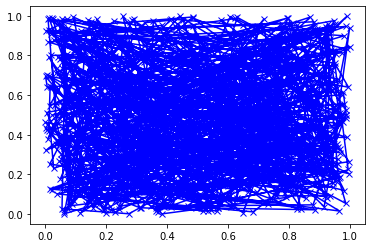

In [21]:
print (distance)
x = [A.data[i][0] for i in A.shortest.travel]
y = [A.data[i][1] for i in A.shortest.travel]
plt.plot(x, y, 'xb-')
plt.show()

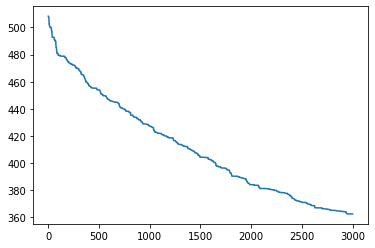

In [22]:
plt.plot(Generation,Distances)
plt.show()

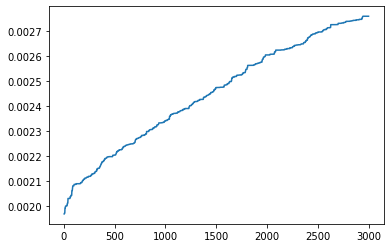

In [23]:
plt.plot(Generation,BestFitness)
plt.show()